In [3]:
#Let's go ahead and start with some python library imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [4]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
#to get rid of import error of pandas_datareader 
pd.core.common.is_list_like = pd.api.types.is_list_like
# For reading stock data from The Investors Exchange (IEX)
import pandas_datareader as web
# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [6]:
import yfinance as yf
import pandas as pd

# Define stock symbols and time period
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
start_date = '2023-10-01'  
end_date = datetime.now()

# Fetch and display data
for stock in tech_list:
    try:
        # Fetch historical stock prices
        df = yf.download(stock, start=start_date, end=end_date)
        globals()[stock] = df
        print(f"Data for {stock} fetched successfully.")
    except Exception as e:
        print(f"Failed to fetch data for {stock}: {e}")

# Optionally, display a few rows of data for verification
# print(AAPL.head())
# print(GOOG.head())
# print(MSFT.head())
# print(AMZN.head())


[*********************100%***********************]  1 of 1 completed


Data for AAPL fetched successfully.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for GOOG fetched successfully.
Data for MSFT fetched successfully.


[*********************100%***********************]  1 of 1 completed

Data for AMZN fetched successfully.


In [7]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,171.220001,174.300003,170.929993,173.750000,172.865417,52164500
2023-10-03,172.259995,173.630005,170.820007,172.399994,171.522308,49594600
2023-10-04,171.089996,174.210007,170.970001,173.660004,172.775894,53020300
2023-10-05,173.789993,175.449997,172.679993,174.910004,174.019531,48527900
2023-10-06,173.800003,177.990005,173.179993,177.490005,176.586395,57224100


In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,239.000000,239.000000,239.000000,239.000000,239.000000,2.390000e+02
mean,192.541255,194.331590,190.902636,192.732511,192.260954,5.890594e+07
std,19.248532,19.473618,18.758677,19.137604,19.306151,2.520773e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,176.264999,178.389999,175.150002,177.530006,176.626190,4.484220e+07
50%,189.330002,190.380005,187.779999,189.369995,188.654114,5.284520e+07
75%,207.544998,213.099998,206.744995,209.170006,208.928177,6.551875e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2023-10-02 to 2024-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       239 non-null    float64
 1   High       239 non-null    float64
 2   Low        239 non-null    float64
 3   Close      239 non-null    float64
 4   Adj Close  239 non-null    float64
 5   Volume     239 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.1 KB


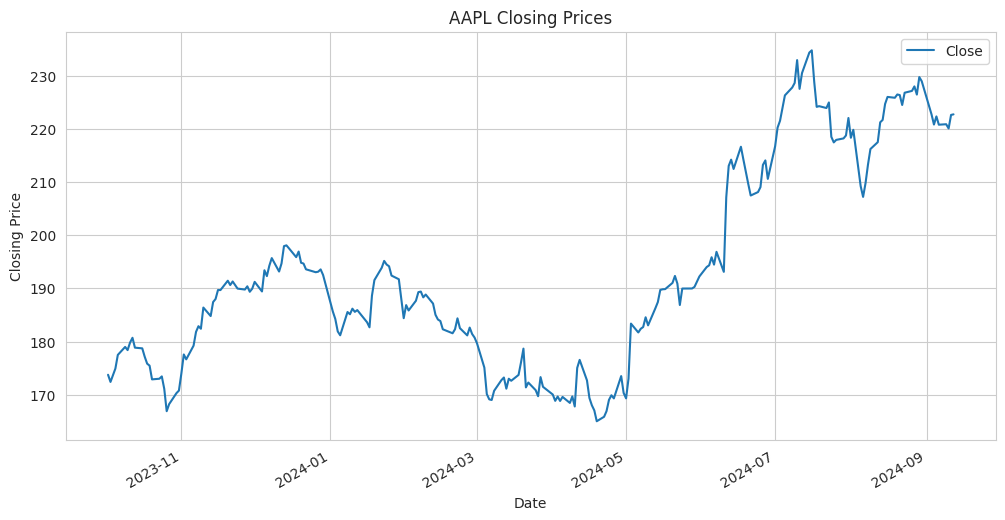

In [10]:
AAPL['Close'].plot(legend=True, figsize=(12, 6))
plt.title('AAPL Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

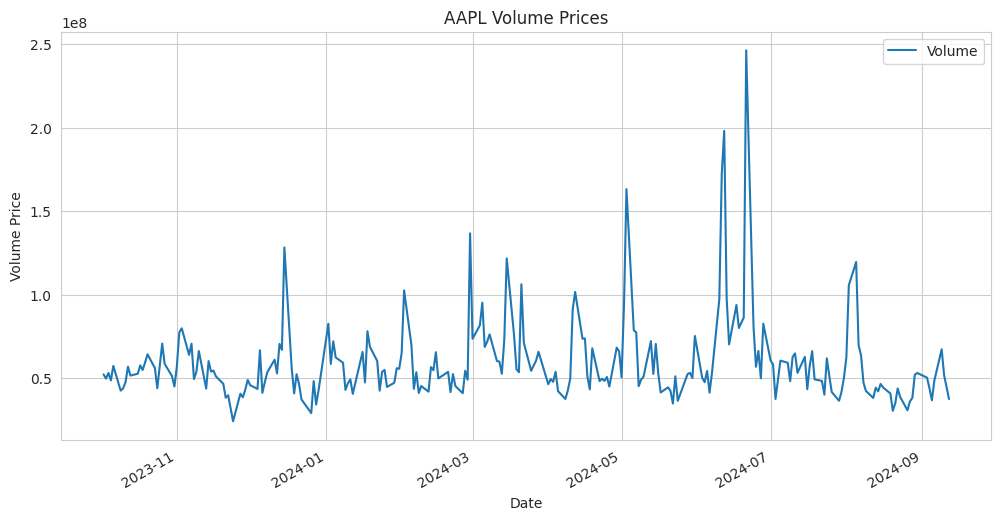

In [11]:
AAPL['Volume'].plot(legend=True, figsize=(12, 6))
plt.title('AAPL Volume Prices')
plt.xlabel('Date')
plt.ylabel('Volume Price')
plt.show()

In [12]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.DataFrame.rolling(AAPL['Close'],ma).mean()

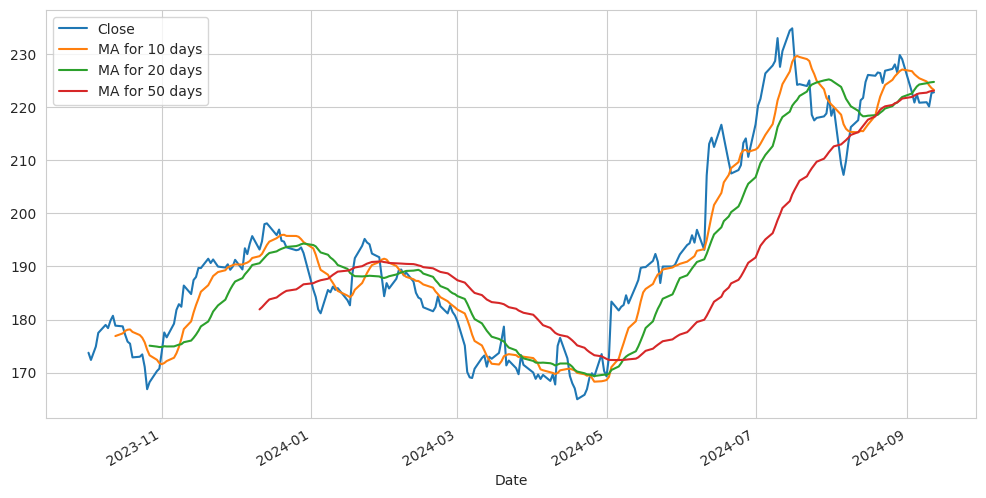

In [13]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

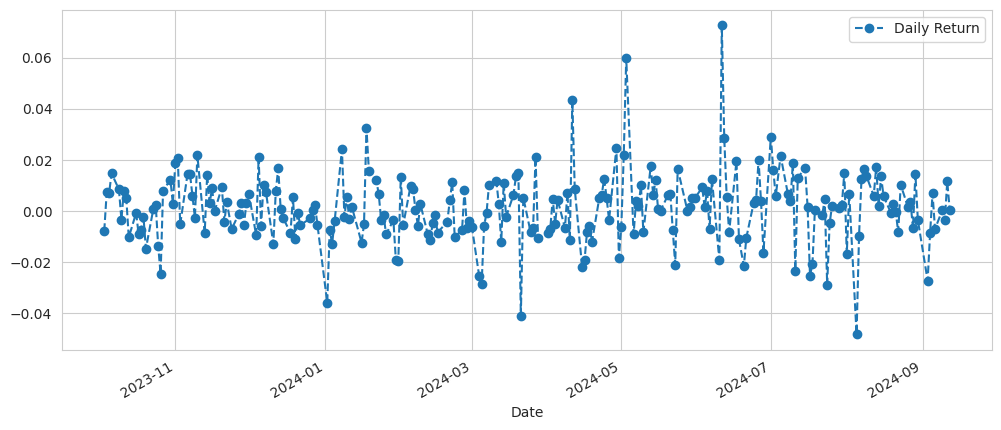

In [14]:
# use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()
# plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

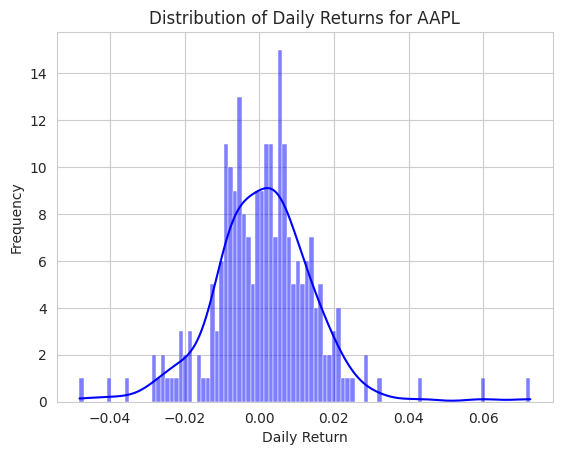

In [15]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(AAPL['Daily Return'].dropna(), bins=100, color='blue', kde=True)
plt.title('Distribution of Daily Returns for AAPL')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Create DataFrames with appropriate column names
closing_df1 = pd.DataFrame(AAPL['Close']).rename(columns={"Close": "AAPL_Close"})
closing_df2 = pd.DataFrame(GOOG['Close']).rename(columns={"Close": "GOOG_Close"})
closing_df3 = pd.DataFrame(MSFT['Close']).rename(columns={"Close": "MSFT_Close"})
closing_df4 = pd.DataFrame(AMZN['Close']).rename(columns={"Close": "AMZN_Close"})

# Concatenate the DataFrames along columns
closing_df = pd.concat([closing_df1, closing_df2, closing_df3, closing_df4], axis=1)

# Display the first few rows to verify
closing_df.head()

# Percent change data
tech_returns = closing_df.pct_change()

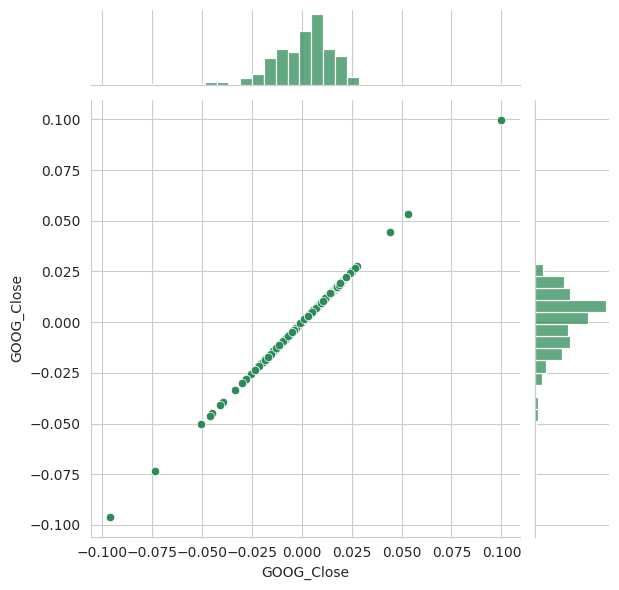

In [17]:
sns.jointplot(x='GOOG_Close', y='GOOG_Close', data=tech_returns, kind='scatter', color='seagreen')

plt.show()

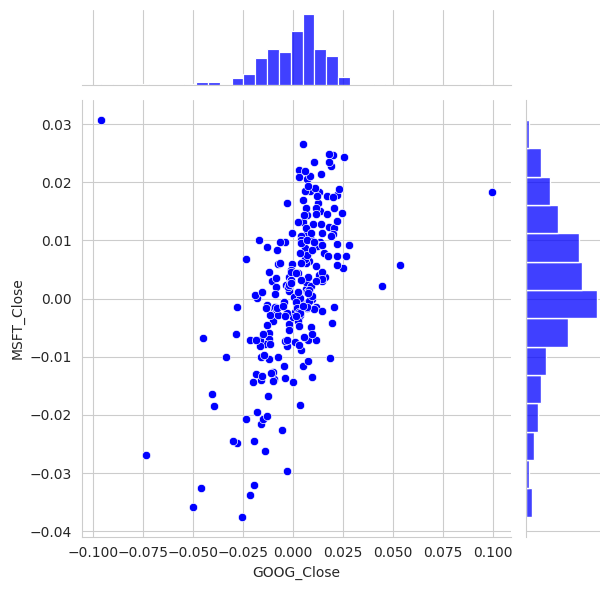

In [18]:
sns.jointplot(x='GOOG_Close', y='MSFT_Close', data=tech_returns, kind='scatter', color='blue')

plt.show()

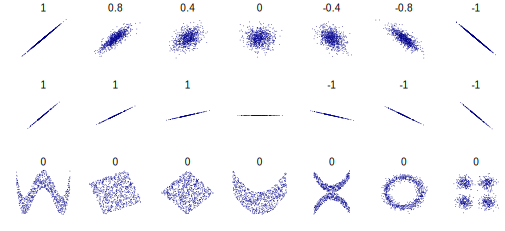

In [19]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

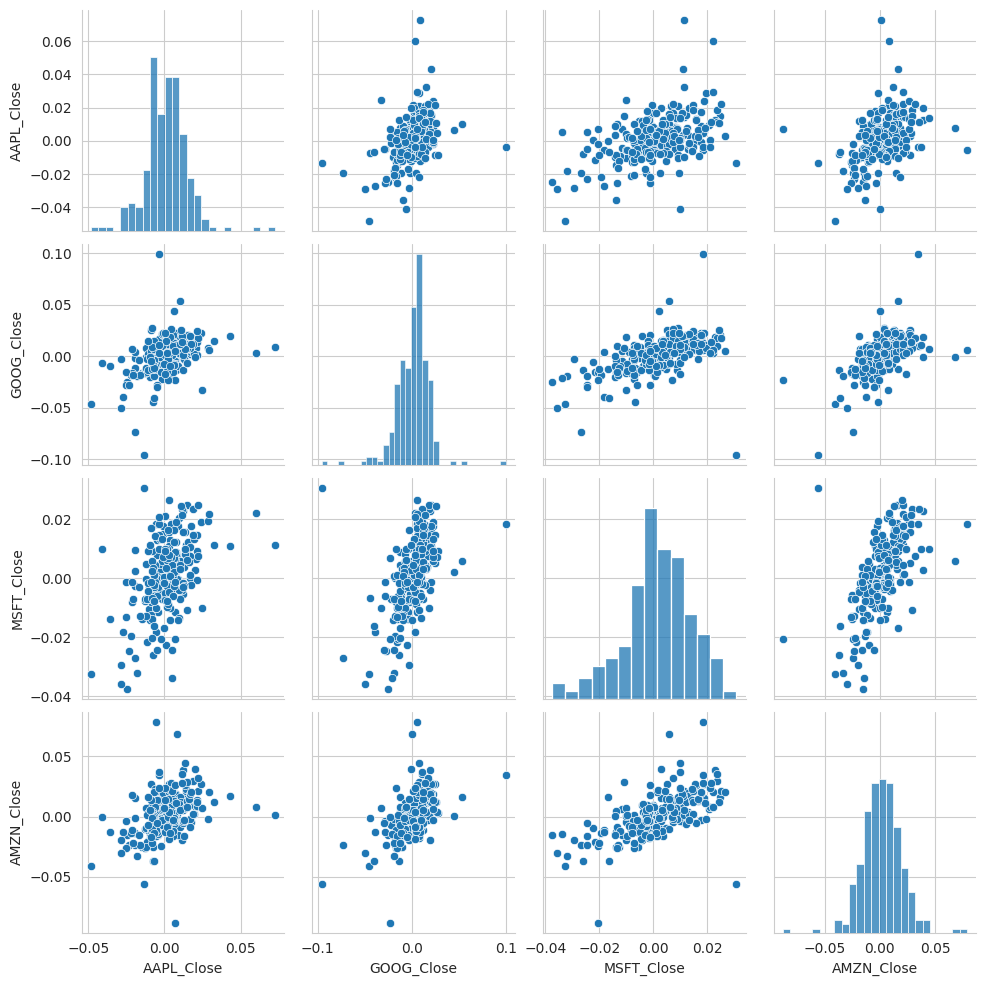

In [20]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna())
plt.show()

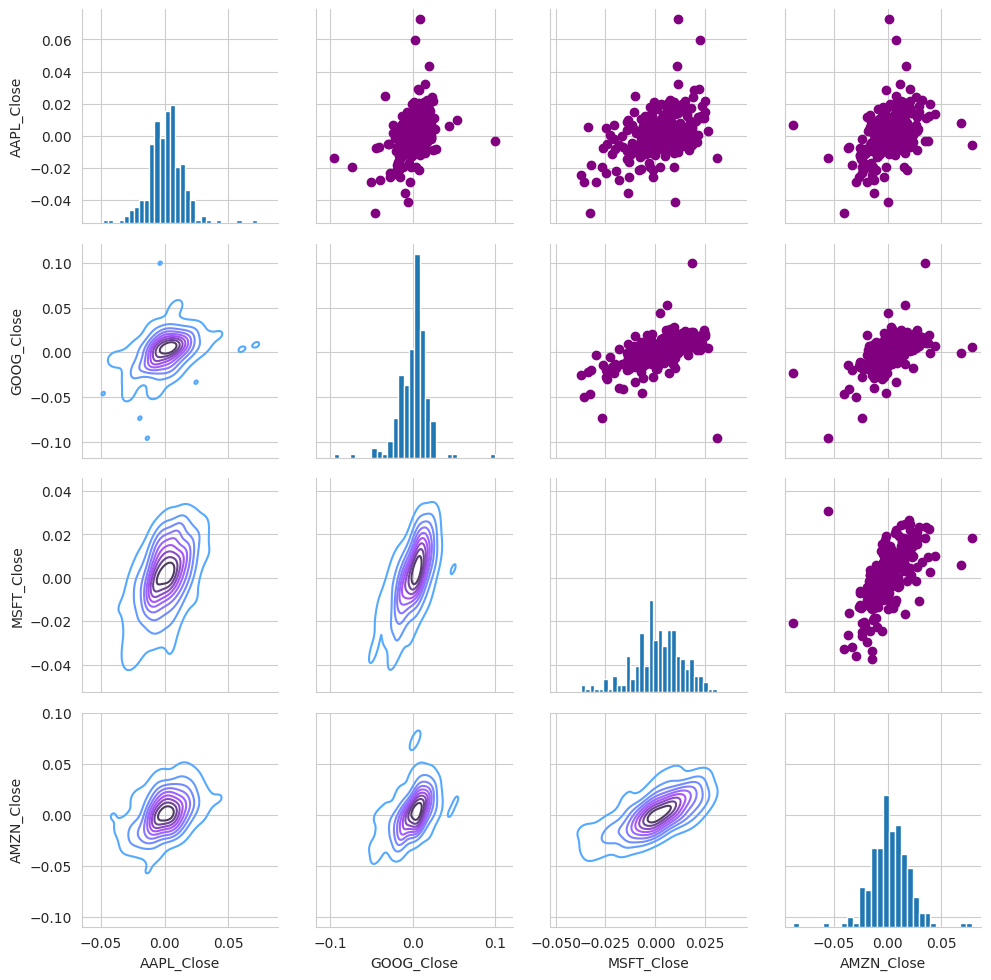

In [21]:
#It may arise warnings, to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


plt.show()

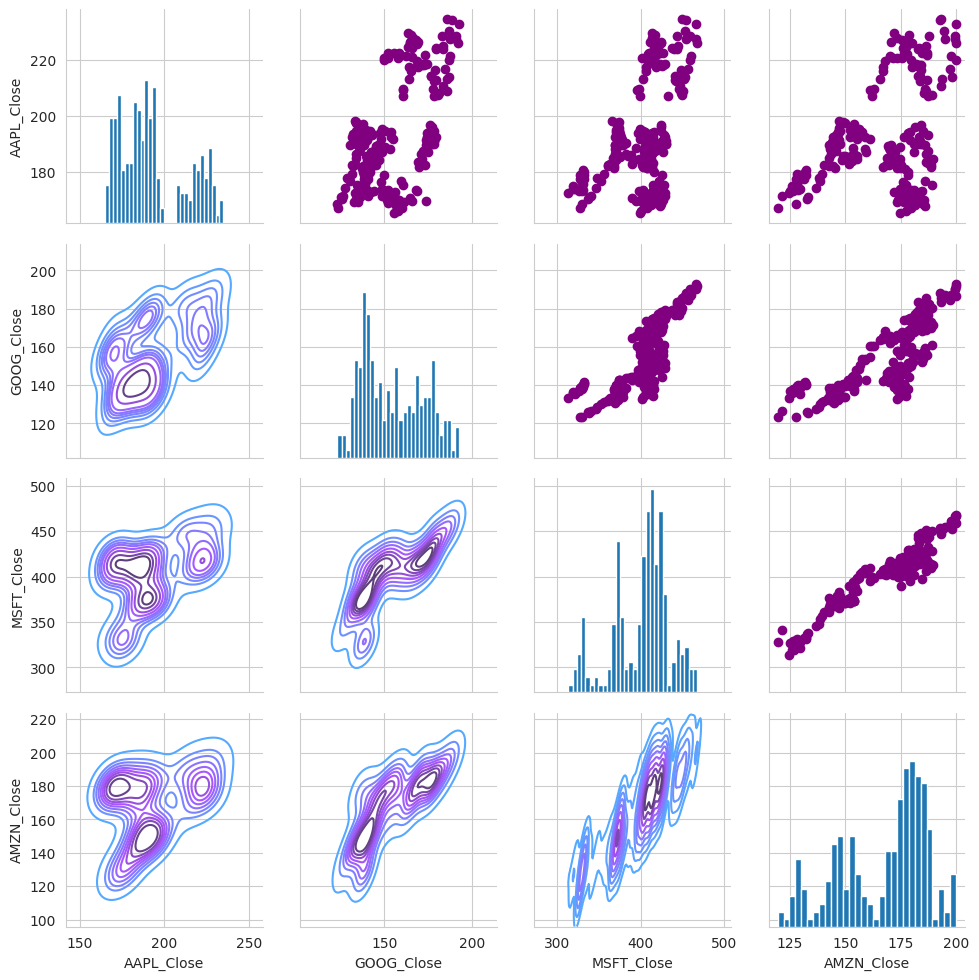

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

plt.show()

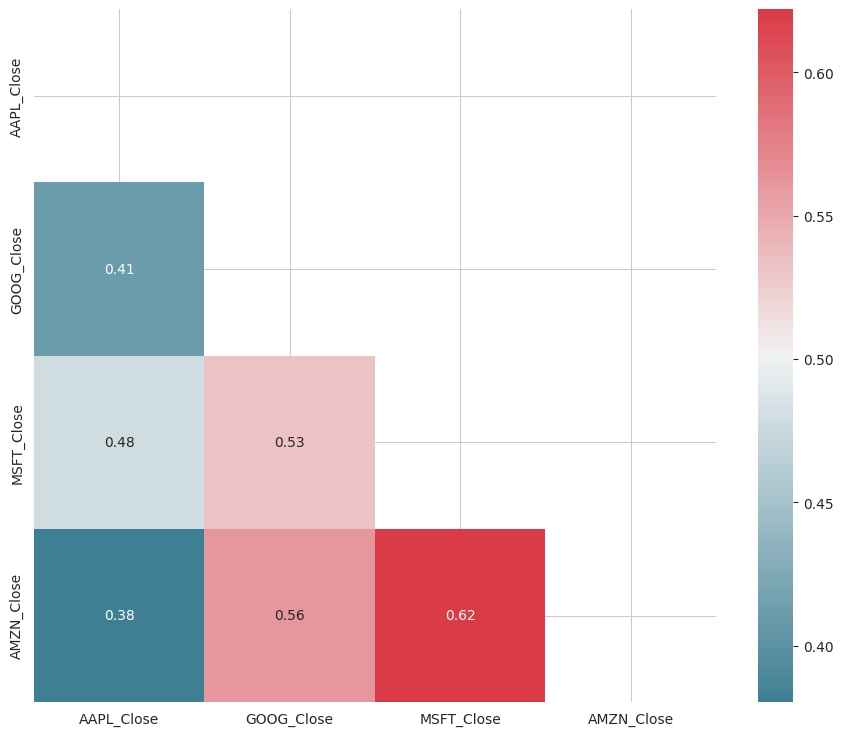

In [23]:
# use sebron for a quick correlation plot for the daily returns

# Compute the correlation matrix
corr = tech_returns.dropna().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)
plt.show()

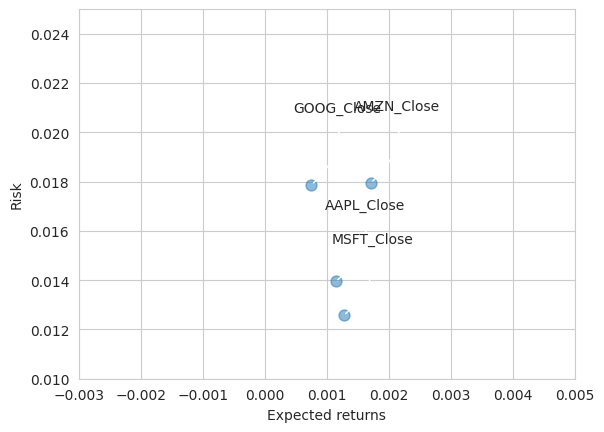

In [24]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Set the x and y limits of the plot
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.005])

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

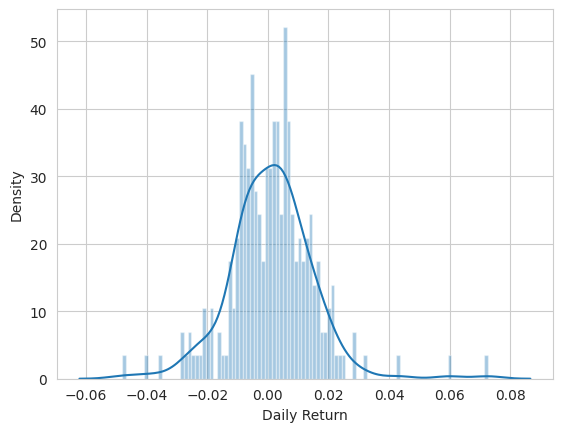

In [25]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)
plt.show()

In [26]:
'''A pure python RETS client for real estate data. Make requests to the MLS server to get real estate listings, media, 
and metadata'''

rets.head()

,AAPL_Close,GOOG_Close,MSFT_Close,AMZN_Close
Date,,,,
2023-10-03,-0.007770,-0.013834,-0.026134,-0.036614
2023-10-04,0.007309,0.022281,0.017773,0.018281
2023-10-05,0.007198,-0.002055,0.001254,-0.008189
2023-10-06,0.014750,0.020148,0.024737,0.015878
2023-10-09,0.008451,0.005550,0.007823,0.002344


In [27]:
# The 0.05 empirical quantile of daily returns
emp = rets['AAPL_Close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.021126311426352518


In [28]:
# Set up our time
days = 365

# Now set delta t
deltaT = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOG_close
mu = rets.mean()['GOOG_Close']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG_Close']

In [29]:
def monte_carlo_simulation(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, number days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1, days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * deltaT, scale=sigma * np.sqrt(deltaT))
        # Calculate Drift
        drift[x] = mu * deltaT
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [30]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,132.154999,135.360001,132.065002,135.169998,134.838852,19210400
2023-10-03,134.929993,135.240005,132.815002,133.300003,132.973434,19628700
2023-10-04,133.660004,136.570007,133.429993,136.270004,135.936172,22848000
2023-10-05,136.130005,136.500000,134.455002,135.990005,135.656860,15922900
2023-10-06,134.940002,139.186005,134.940002,138.729996,138.390137,20819300


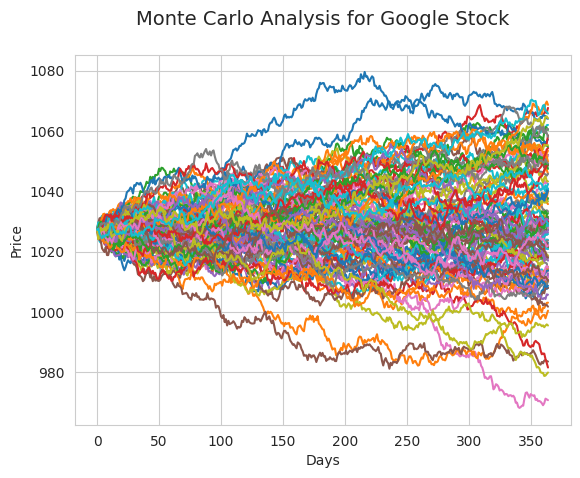

In [31]:
start_price = 1027.27

for run in range(100):
    plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Google Stock\n', fontsize = 14)
plt.show()

In [32]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = monte_carlo_simulation(start_price, days, mu, sigma)[days-1]

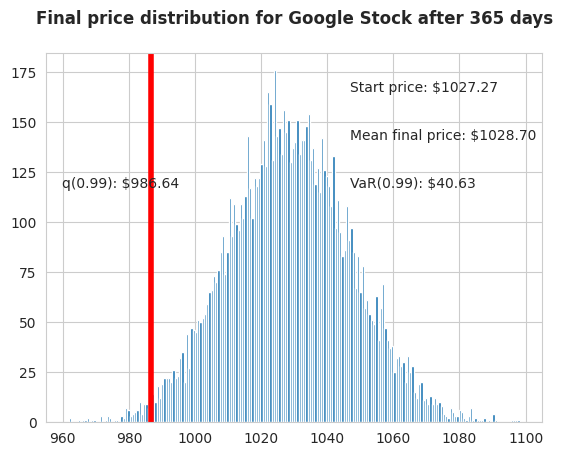

In [33]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Use plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days\n" % days, weight='bold');